Интерполирование

In [53]:
import math
# задаем функцию y(x) согласно варианту
def y(x):
  return 2 * np.cos(x)

In [54]:
# заданим узлы интерполяции
xi = [-4,-3,2,-1,0]
yi = [2,0,1,-1,-3]
print ('Узлы интерполяции: xi =', xi, '\t\nyi = ', yi)

Узлы интерполяции: xi = [-4, -3, 2, -1, 0] 	
yi =  [2, 0, 1, -1, -3]


In [56]:
# библиотеки
import numpy as np # для работы с массивами
from numpy.polynomial.polynomial import Polynomial # для построения полинома
from scipy.interpolate import lagrange # функция полинома Лагранжа
poly = lagrange(xi, yi) # ИП в форме Лагранжа
midpoints = []
for i in range (len(xi)-1):
  midpoints.append((xi[i] + xi[i+1])/2) # значения в средних точках
poly_dots = np.flip(Polynomial(poly.coef[::-1]).coef) # коэф. полинома
k = len(poly_dots) # размерность оплинома 
# функция значения ИП в точке
def poly_in_dot(dot):
  result = 0 # переменная для вычисления результата
  # вычисление значения ип
  for t in range (0, k):
    result += poly[t] * dot**(k-t-1)
  return result
# пустые списки для заполнения значениями ИП в средних точках и точное значение
sred = [] 
tochno = []
# заполняем в цикле
for u in range(0, len(midpoints)):
  sred.append(poly_in_dot(midpoints[u]))
for r in range(0, len(xi)):
  tochno.append(poly_in_dot(xi[r]))
# вывод результатов
print('Точное значение ИП:', tochno, '\t\nЗначение ИП в средних точках', sred)

Точное значение ИП: [-633.8750000000001, -186.0888888888889, -61.074999999999996, -1.0, 0.10277777777777777] 	
Значение ИП в средних точках [-360.0763888888889, -0.005555555555555619, 0.06250000000000003, -0.005555555555555619]


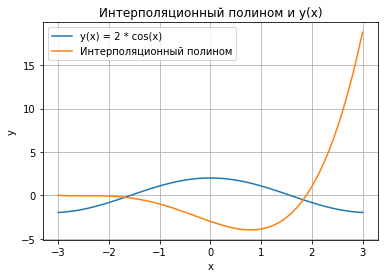

In [57]:
# библиотека построения графиков
import matplotlib.pyplot as plt
# графики в одних осях
x1 = np.arange(-3, 3.1, 0.1)
plt.plot(x1, y(x1), label = 'y(x) = 2 * cos(x)')
plt.plot(x1, poly(x1),label = 'Интерполяционный полином')
plt.title('Интерполяционный полином и y(x)')
plt.legend()
plt.xlabel('x')# Название оси X
plt.ylabel('y')# Название оси Y
plt.grid() # отображение сетки
plt.show() # отображение графика

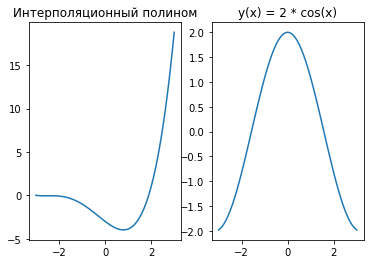

In [58]:
# графики в разных осях
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1, poly(x1))
ax1.set_title('Интерполяционный полином')
ax2.plot(x1, y(x1))
ax2.set_title('y(x) = 2 * cos(x)')
plt.show()

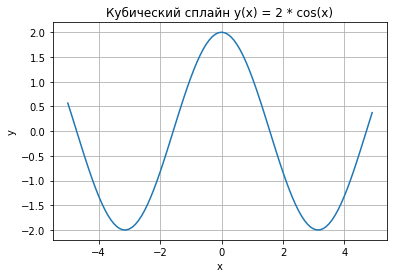

In [59]:
# Интерполяция кубическими сплайнами
from scipy.interpolate import CubicSpline 
x2 = np.arange(-5,5,0.1) # задаем массив чисел для построения
cub_spline = CubicSpline(x2, y(x2)) # задаем кубический сплайн
plt.title('Кубический сплайн y(x) = 2 * cos(x)')# Добавим заголовок графика
plt.xlabel('x')# Название оси X
plt.ylabel('y')# Название оси Y
plt.grid() # отображение сетки
plt.plot(x2, cub_spline(x2)) # построение графика
plt.show() # отображение графика

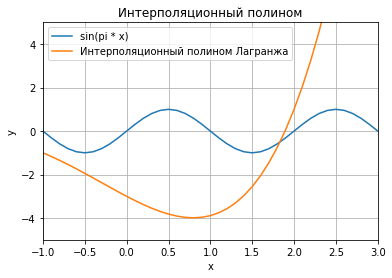

Введите x: 0
Значение в заданной точке х = 0.1028 Значение в точке у = 0.0


In [60]:
# По таблично заданной функции построить ИП в форме Лагранжа 
#и сравнить его значение в заданной точке х (вводится с клавиатуры) со значением функции y=sin(𝛑x)
plt.figure() # создаем поле для построения графика
xii = np.arange(-3, 3.1, 0.1)
plt.plot(xii, np.sin(np.pi*xii), label='sin(pi * x)') # график функции sin(pi * x)
plt.plot(xii, poly(xii), label='Интерполяционный полином Лагранжа') # интерполяционный полином
# размерность осей графика
plt.xlim(-1, 3)
plt.ylim(-5, 5)
# визуальное отображение
plt.grid() # сетка
plt.legend() # легенда
plt.title('Интерполяционный полином') # заголовок графика
plt.xlabel('x') # название оси х
plt.ylabel('y') # название оси у
plt.show() # вывод графика
inputed_x = float(input('Введите x: ')) # ввод заданной точки хi
y1 = np.sin(np.pi*inputed_x) # значение функции
Lagrange_dot_x = poly_in_dot(inputed_x) # интерполяционный полином в точке
# вывод результата
print('Значение в заданной точке х =', round(Lagrange_dot_x,4), 'Значение в точке у =', round(y1,4))